# **Heart Disease Prediction: Detecting Left Bundle Branch Block (LBBB) Using Signal Processing and AI** 
<img src="Pics/Intro.png"/>

##### This project aims to develop a predictive framework for detecting Left Bundle Branch Block (LBBB), a key cardiac abnormality linked to heart disease. Using signal-processing techniques, we preprocess cardiac signals, extract critical features, and apply machine learning models for accurate classification. This notebook outlines the entire process, from data preparation to model evaluation.
-----

## Section 1: Reading and Understanding the Data

### Importing Libraries

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pywt
from scipy.stats import skew, kurtosis,entropy
from sklearn.utils import shuffle

### Reading the Data

In [168]:
train_normal = pd.read_csv("Normal&LBBB/Normal_Train.txt", delimiter = '|', header=None)
train_lbbb = pd.read_csv("Normal&LBBB/LBBB_Train.txt", delimiter = '|', header=None)
test_normal = pd.read_csv("Normal&LBBB/Normal_Test.txt", delimiter = '|', header=None)
test_lbbb = pd.read_csv("Normal&LBBB/LBBB_Test.txt", delimiter = '|', header=None)

In [169]:
print(train_normal.shape)
print(train_lbbb.shape)
print(test_normal.shape)
print(test_lbbb.shape)

(200, 301)
(399, 301)
(200, 301)
(394, 301)


In [170]:
train_normal.head(5)

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
0,-0.050778,-0.050778,-0.040778,-0.035778,-0.045778,-0.055778,-0.065778,-0.045778,-0.050778,-0.040778,...,0.029222,0.019222,0.004222,-0.005778,0.004222,0.014222,0.014222,0.019222,0.019222,NaN
1,0.019222,0.014222,0.009222,-0.000778,0.004222,0.019222,0.019222,0.009222,0.014222,0.009222,...,-0.060778,-0.065778,-0.055778,-0.060778,-0.060778,-0.060778,-0.065778,-0.060778,-0.060778,NaN
2,-0.070778,-0.080778,-0.080778,-0.060778,-0.055778,-0.075778,-0.100780,-0.095778,-0.075778,-0.060778,...,-0.105780,-0.115780,-0.130780,-0.125780,-0.115780,-0.115780,-0.125780,-0.135780,-0.120780,NaN
3,-0.130780,-0.120780,-0.100780,-0.125780,-0.135780,-0.145780,-0.135780,-0.125780,-0.115780,-0.120780,...,-0.030778,-0.035778,-0.035778,-0.035778,-0.035778,-0.025778,-0.035778,-0.035778,-0.045778,NaN
4,-0.030778,-0.025778,-0.040778,-0.045778,-0.040778,-0.040778,-0.025778,-0.015778,-0.035778,-0.035778,...,-0.165780,-0.165780,-0.160780,-0.160780,-0.175780,-0.185780,-0.175780,-0.180780,-0.165780,NaN


In [171]:
train_lbbb.head(5)

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
0,-0.009065,0.005935,0.005935,0.000935,-0.019065,-0.024065,-0.009065,-0.019065,-0.004065,0.000935,...,0.745930,0.730930,0.720930,0.730930,0.740930,0.735930,0.725930,0.715930,0.705930,NaN
1,0.000935,0.010935,0.010935,0.005935,0.000935,0.000935,0.015935,0.010935,0.010935,0.010935,...,0.510930,0.500930,0.490930,0.495930,0.485930,0.460930,0.460930,0.440930,0.445930,NaN
2,-0.259070,-0.264070,-0.274070,-0.284070,-0.269070,-0.264070,-0.244070,-0.234070,-0.214070,-0.224070,...,-0.074065,-0.084065,-0.069065,-0.059065,-0.069065,-0.089065,-0.104070,-0.109070,-0.114070,NaN
3,-0.074065,-0.084065,-0.069065,-0.059065,-0.069065,-0.089065,-0.104070,-0.109070,-0.114070,-0.109070,...,-0.459070,-0.454070,-0.479070,-0.489070,-0.484070,-0.489070,-0.474070,-0.489070,-0.504070,NaN
4,-0.574070,-0.589070,-0.604070,-0.589070,-0.579070,-0.584070,-0.574070,-0.589070,-0.584070,-0.589070,...,0.000935,0.035935,0.045935,0.065935,0.055935,0.035935,0.030935,0.060935,0.085935,NaN


In [172]:
test_normal.head(5)

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
0,-0.013701,-0.023701,-0.018701,-0.008701,-0.003701,0.001299,0.001299,-0.003701,0.006299,0.001299,...,-0.023701,-0.023701,-0.028701,-0.038701,-0.043701,-0.043701,-0.033701,-0.023701,-0.038701,NaN
1,-0.023701,-0.028701,-0.038701,-0.043701,-0.043701,-0.033701,-0.023701,-0.038701,-0.038701,-0.048701,...,-0.078701,-0.048701,-0.053701,-0.048701,-0.053701,-0.053701,-0.063701,-0.053701,-0.038701,NaN
2,-0.048701,-0.058701,-0.053701,-0.048701,-0.048701,-0.048701,-0.068701,-0.078701,-0.048701,-0.053701,...,-0.038701,-0.038701,-0.043701,-0.048701,-0.038701,-0.023701,-0.023701,-0.028701,-0.028701,NaN
3,-0.033701,-0.038701,-0.038701,-0.073701,-0.053701,-0.053701,-0.038701,-0.038701,-0.043701,-0.048701,...,-0.033701,-0.033701,-0.018701,-0.018701,-0.018701,-0.038701,-0.043701,-0.033701,-0.023701,NaN
4,-0.023701,-0.028701,-0.028701,-0.023701,-0.023701,-0.023701,-0.033701,-0.033701,-0.033701,-0.018701,...,-0.003701,-0.013701,-0.023701,-0.023701,-0.028701,-0.023701,-0.023701,-0.013701,-0.013701,NaN


In [173]:
test_lbbb.head(5)

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
0,0.045325,0.015325,-0.004675,-0.009675,0.030325,0.070325,0.085325,0.055325,0.035325,0.030325,...,-0.30967,-0.34467,-0.35967,-0.38967,-0.42467,-0.43467,-0.44967,-0.41467,-0.36967,NaN
1,-0.079675,-0.064675,-0.069675,-0.059675,-0.079675,-0.104670,-0.134670,-0.144670,-0.169670,-0.169670,...,-0.68467,-0.65967,-0.61967,-0.60967,-0.62467,-0.64967,-0.66467,-0.66967,-0.63467,NaN
2,-0.409670,-0.429670,-0.409670,-0.374670,-0.364670,-0.344670,-0.349670,-0.384670,-0.399670,-0.394670,...,-0.60967,-0.60467,-0.60467,-0.59967,-0.59467,-0.58467,-0.58467,-0.58467,-0.59967,NaN
3,-0.349670,-0.339670,-0.319670,-0.314670,-0.319670,-0.334670,-0.339670,-0.324670,-0.309670,-0.324670,...,-0.42967,-0.44967,-0.45467,-0.44967,-0.43467,-0.42967,-0.44967,-0.46467,-0.45467,NaN
4,-0.144670,-0.129670,-0.129670,-0.129670,-0.149670,-0.149670,-0.144670,-0.149670,-0.134670,-0.164670,...,-0.36467,-0.36467,-0.36967,-0.36967,-0.36467,-0.34967,-0.34467,-0.34967,-0.35467,NaN


It seems that the file contains an extra delimiter '|' with nothing after it which caused the last column in every table to be NaN so we consider droping the last column in every table.

In [174]:
train_normal = train_normal.iloc[:, :-1]
train_lbbb = train_lbbb.iloc[:, :-1]
test_normal = test_normal.iloc[:, :-1]
test_lbbb = test_lbbb.iloc[:, :-1]

### Visualizing our Signals

In [175]:
def plot_ecg_signal(data):
    """
    Plot ECG signal from a DataFrame where columns are sample indices
    and the single row contains the signal amplitudes.
    
    Parameters:
    data (pandas.DataFrame): DataFrame containing ECG samples
    """
    # Convert the single row to a format suitable for seaborn
    # Reset the index to get sample numbers as x-axis values
    signal_df = pd.DataFrame({
        'Sample': range(len(data.columns)),
        'Amplitude': data.iloc[0].values
    })
    
    # Create the plot
    plt.figure(figsize=(15, 5))
    sns.set_style("whitegrid")
    
    # Plot the signal
    sns.lineplot(data=signal_df, x='Sample', y='Amplitude', linewidth=1, color='red')
    
    # Customize the plot
    plt.title('ECG Signal', pad=15)
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    
    # Show the plot
    plt.tight_layout()
    plt.show()

Normal Heart ECG

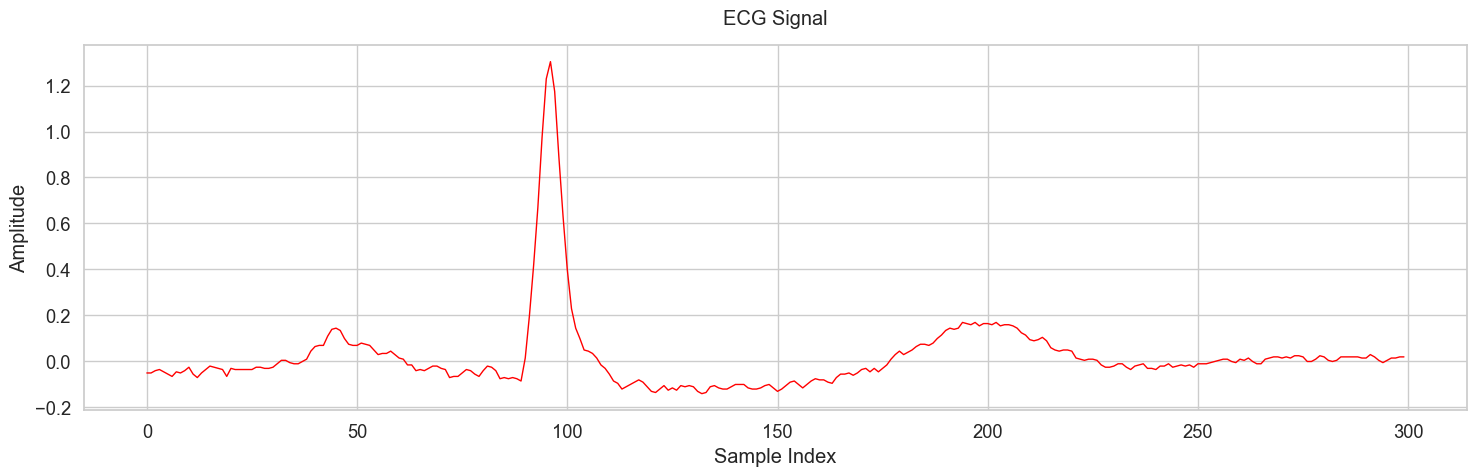

In [176]:
plot_ecg_signal(train_normal)

LBBB ECG

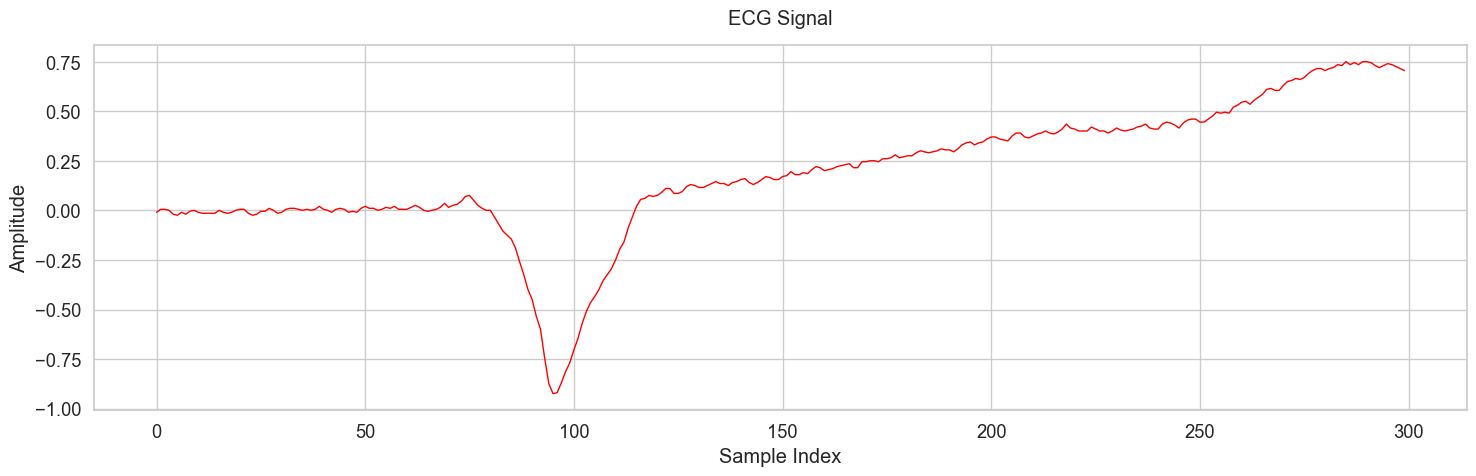

In [177]:
plot_ecg_signal(train_lbbb)

----

## Section 2: Signal Preprocessing

For our signal samples to be ready for processing and classification we need to make sure that they are generalized to one form so our models consider them as the same entity.
To do so we consider the following:
- Removing the DC-Component (mean subtraction). 
- Filtering using BandPass (Butterworth 0.5 to 40).
- Normalizing the signal (0 to 1 interval).

In [178]:
from utils import *

### Applying our preprocessing using our custom utility functions

In [179]:
processed_normal_train = preprocess_ecg_batch(train_normal,360)
processed_lbbb_train = preprocess_ecg_batch(train_lbbb, 360)
processed_normal_test = preprocess_ecg_batch(test_normal,360)
processed_lbbb_test = preprocess_ecg_batch(test_lbbb, 360)



### Visualizing our signals before and after preprocessing

Normal ECG

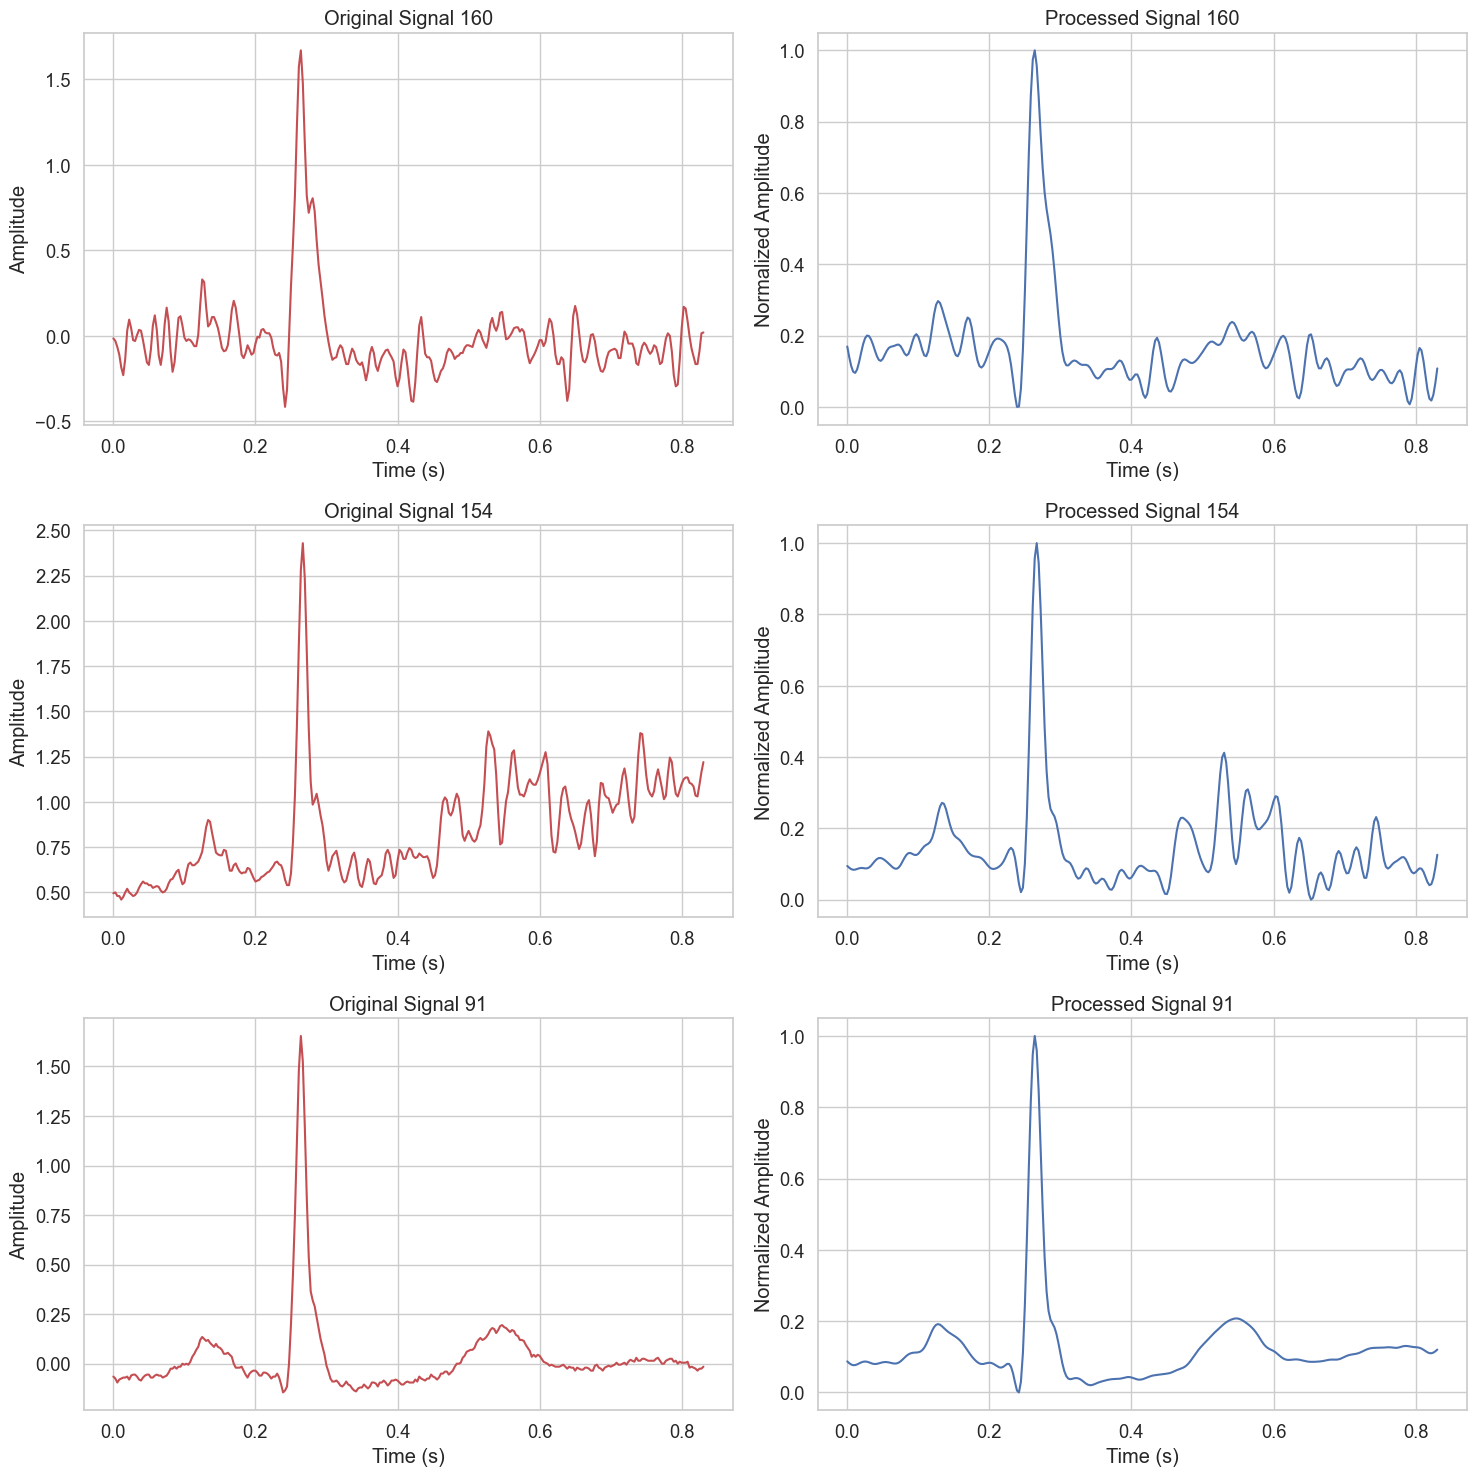

In [180]:
plot_signal_comparison(train_normal, processed_normal_train, 360)

LBBB ECG

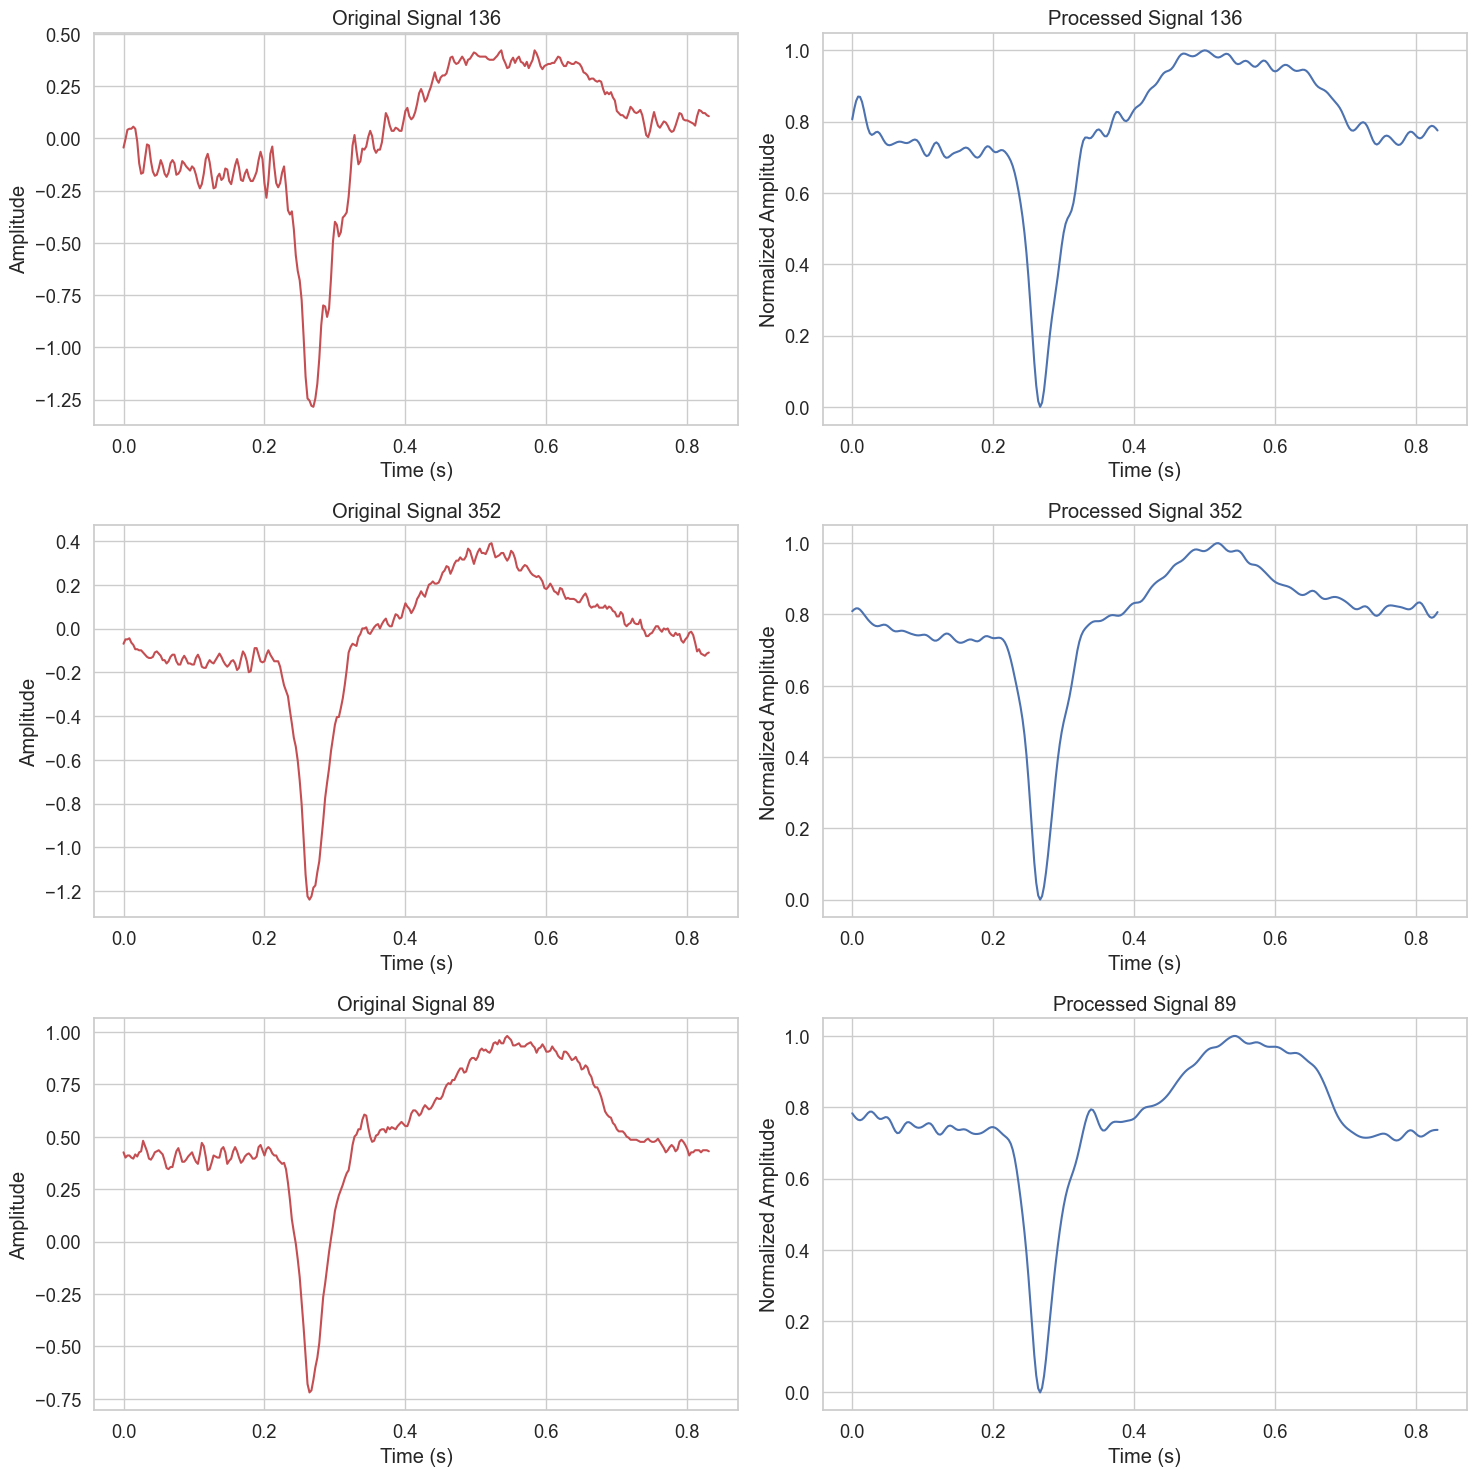

In [181]:
plot_signal_comparison(train_lbbb, processed_lbbb_train, 360)

----

## Section 3: Discrete Wavelet Transform for Feature Extraction

c:\Git\ECG-LBBB-model\utils.py:131: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


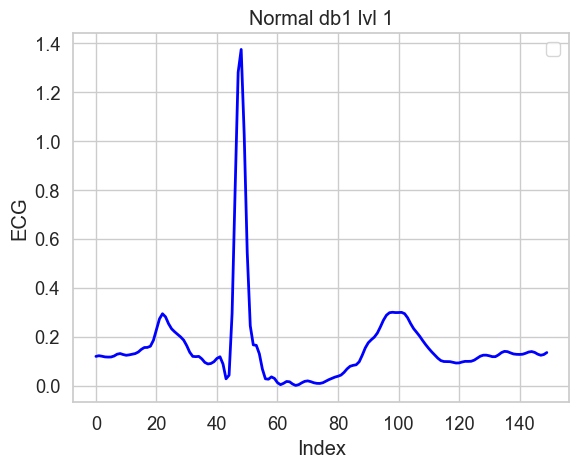

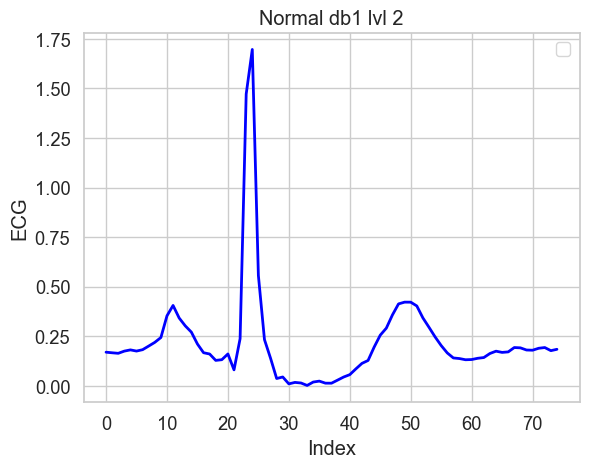

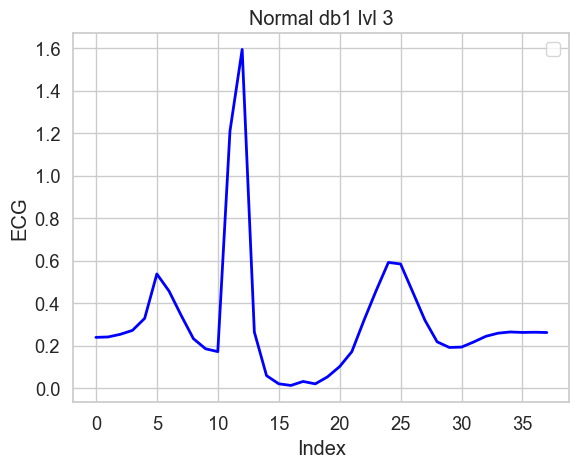

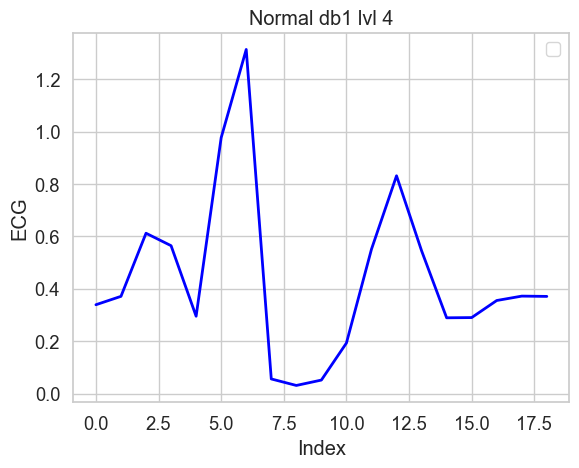

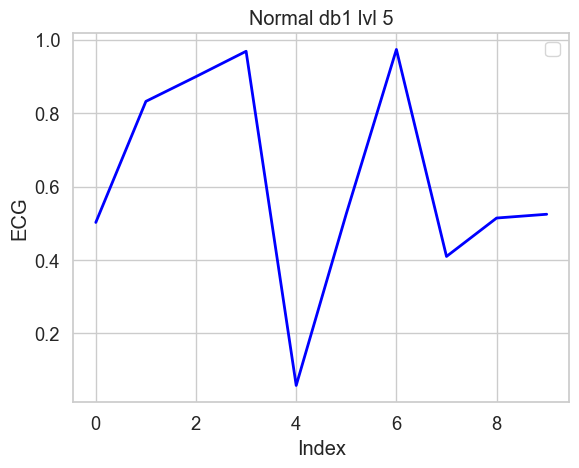

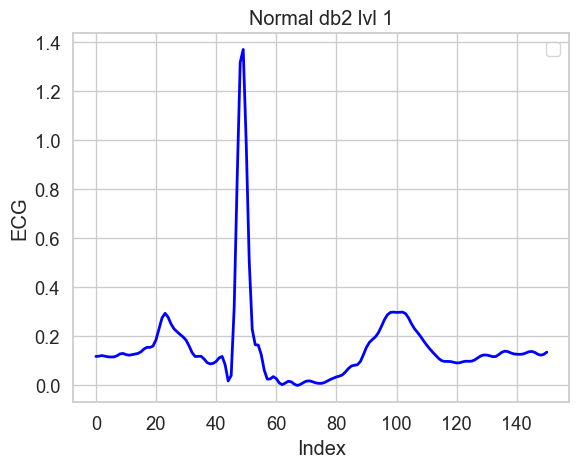

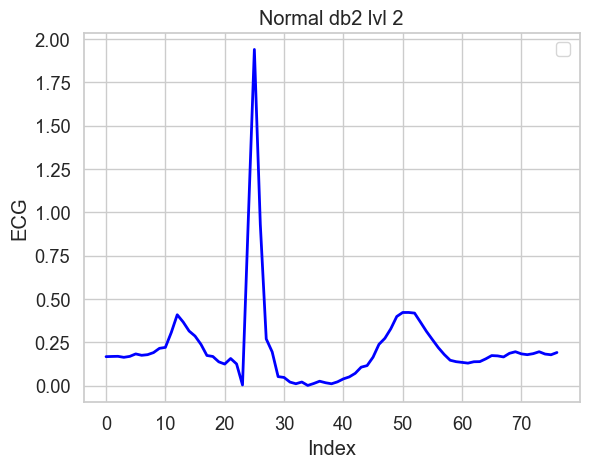

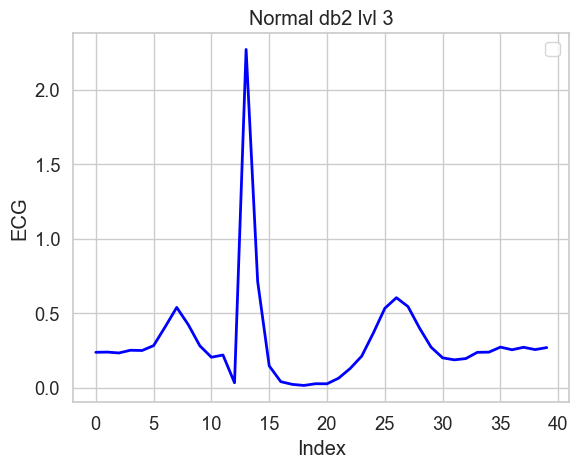

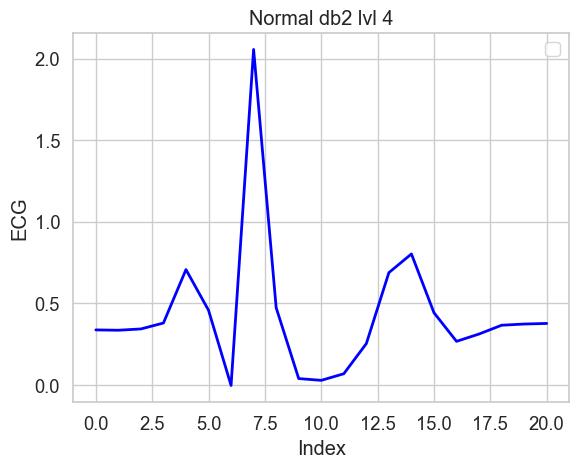

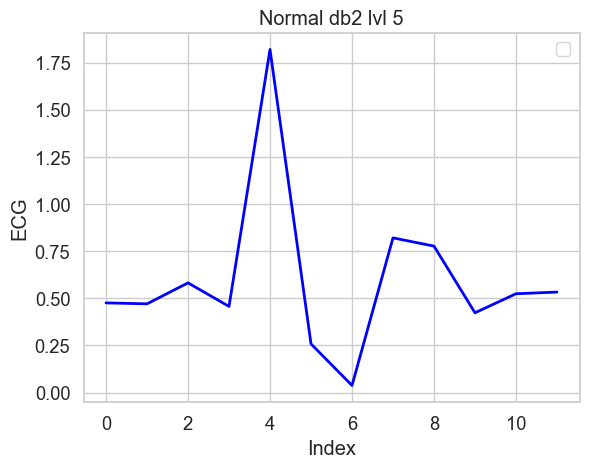

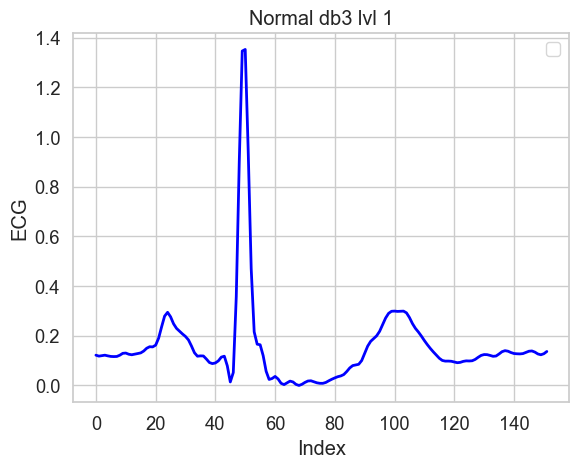

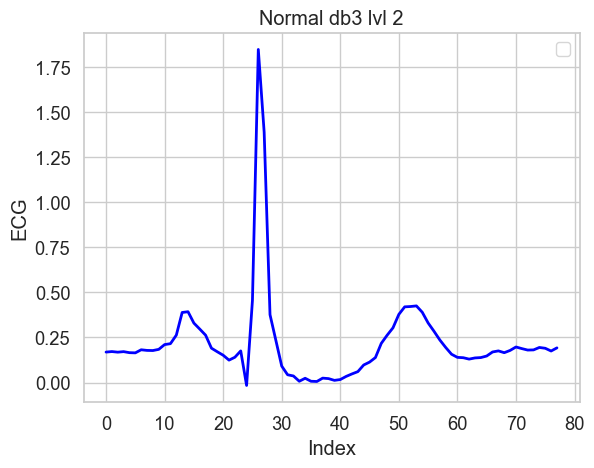

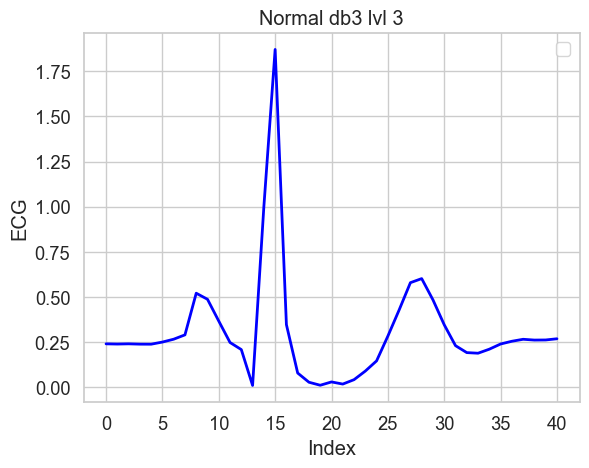

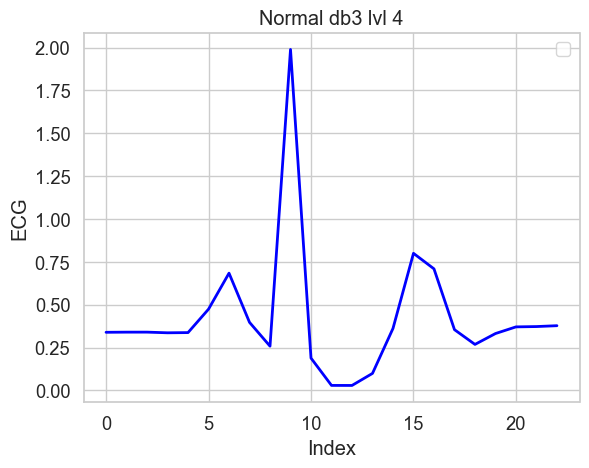

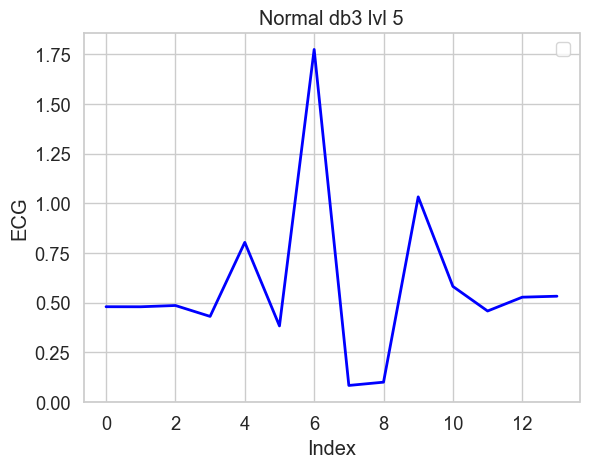

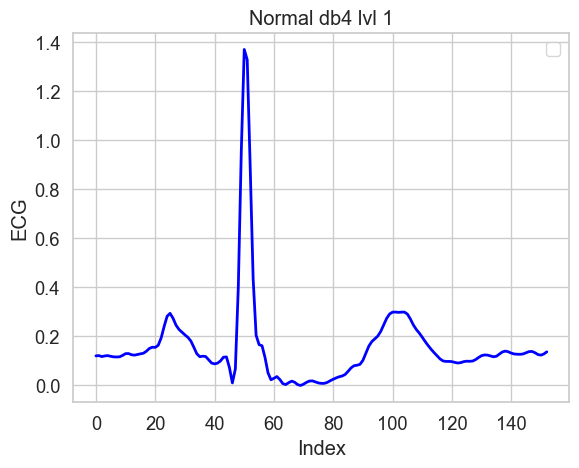

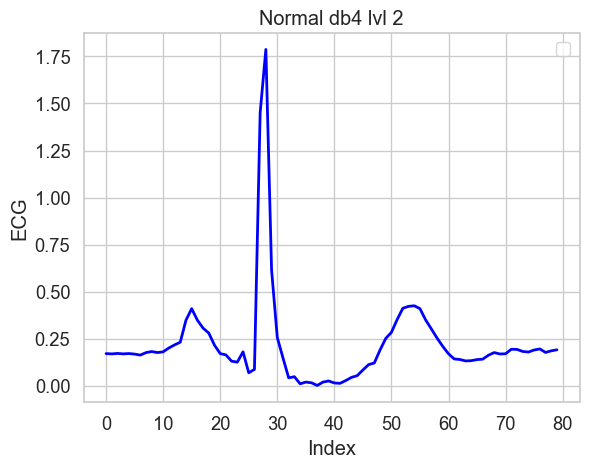

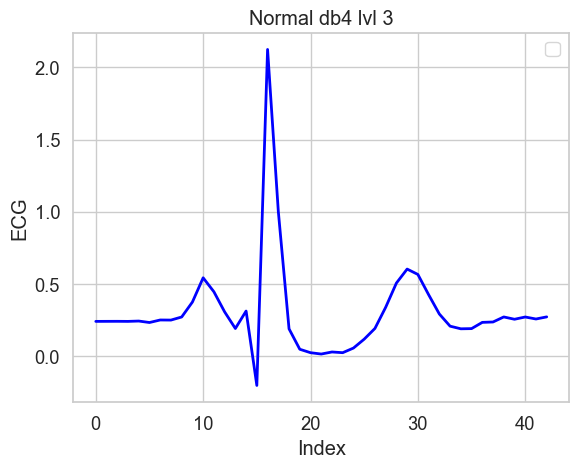

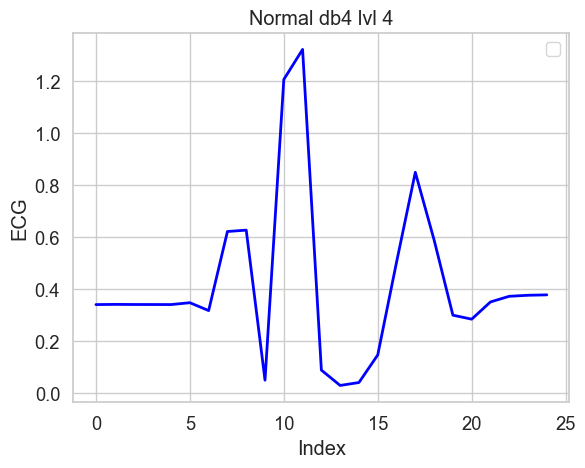

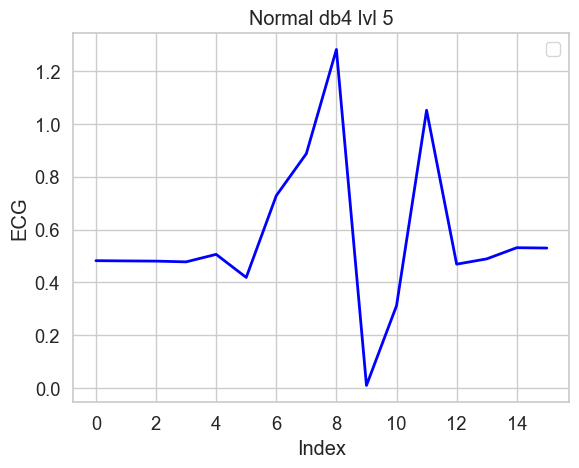

In [182]:
for i in range(4):
    for j in range(5):
        WAVELET_FAMILY = 'db' + str(i + 1)
        LEVEL = j + 1
        train_app=[]
        test_app=[]
        for signal in range(5):
            train_coeff=pywt.wavedec(processed_normal_train.iloc[signal].values,wavelet=WAVELET_FAMILY,level=LEVEL)
            train_app.append(train_coeff[0])
        
        plot(train_app[0],"Normal " + WAVELET_FAMILY + " lvl " + str(LEVEL))

In [183]:
# put labels
processed_normal_train['label'] = 0
processed_lbbb_train['label'] = 1
processed_normal_test['label'] = 0
processed_lbbb_test['label'] = 1

In [184]:
# Combine datasets
train_data = pd.concat([processed_normal_train, processed_lbbb_train], axis=0).reset_index(drop=True)
test_data = pd.concat([processed_normal_test, processed_lbbb_test], axis=0).reset_index(drop=True)

In [185]:
# Shuffle the combined datasets
train_data = shuffle(train_data, random_state=42).reset_index(drop=True)
test_data = shuffle(test_data, random_state=42).reset_index(drop=True)

In [186]:
# Separate features and labels
X_train = train_data.iloc[:, :-1].values
y_train = train_data['label'].values
X_test = test_data.iloc[:, :-1].values
y_test = test_data['label'].values

In [187]:
# Extract features
wavelet_train = extract_wavelet_features(X_train)
wavelet_test = extract_wavelet_features(X_test)
X_train = wavelet_train
X_test = wavelet_test

In [188]:
print(wavelet_train)

[[ 0.37737508  0.27177959  3.28335463 14.76262411]
 [ 1.57117068  0.35189644 -2.40874425  7.00910082]
 [ 1.61349693  0.37797147 -2.43178909  6.15784463]
 ...
 [ 1.42584731  0.35946245 -1.31932658  3.37194474]
 [ 1.57919849  0.34401199 -2.41774553  7.42655658]
 [ 0.28416364  0.26129211  3.95481478 20.46031652]]


----

## Section 4: Modelling

### Importing the models

In [189]:
# Importing the Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay

In [190]:
def model_evaluation(clf, X_train, X_test, y_train, y_test, model_name):
    '''
    This function provides a complete report of the model's performance including classification reports,
    confusion matrix.
    '''
    sns.set(font_scale=1.2)

    # Generate classification report for training set
    y_pred_train = clf.predict(X_train)
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train, y_pred_train))

    # Generate classification report for test set
    y_pred_test = clf.predict(X_test)
    print("\n\t   Classification report for test set")
    print("-"*55)
    print(classification_report(y_test, y_pred_test))

    # Create figure and subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot confusion matrix for test set
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, colorbar=False, cmap='Blues', ax=ax1)
    ax1.set_title('Confusion Matrix for Test Data')
    ax1.grid(False)

    # Report results for the class specified by positive label
    result = metrics_calculator(clf, X_test, y_test, model_name)
    table = ax2.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(2, 2)
    table.set_fontsize(12)
    ax2.axis('tight')
    ax2.axis('off')
    # Modify color
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('white')
    plt.tight_layout()
    plt.show()

In [191]:
def metrics_calculator(clf, X_test, y_test, model_name):
    '''
    This function calculates all desired performance metrics for a given model on test data.
    '''
    y_pred = clf.predict(X_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='binary'),
                                recall_score(y_test, y_pred, average='binary'),
                                f1_score(y_test, y_pred, average='binary')],
                          index=['Accuracy','Precision','Recall','F1-score'],
                          columns = [model_name])

    result = (result * 100).round(2).astype(str) + '%'
    return result

### K-Nearest Neighbor Classifier


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       200
           1       0.99      1.00      1.00       399

    accuracy                           0.99       599
   macro avg       1.00      0.99      0.99       599
weighted avg       1.00      0.99      0.99       599


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       200
           1       1.00      0.87      0.93       394

    accuracy                           0.91       594
   macro avg       0.90      0.93      0.91       594
weighted avg       0.93      0.91      0.91       594



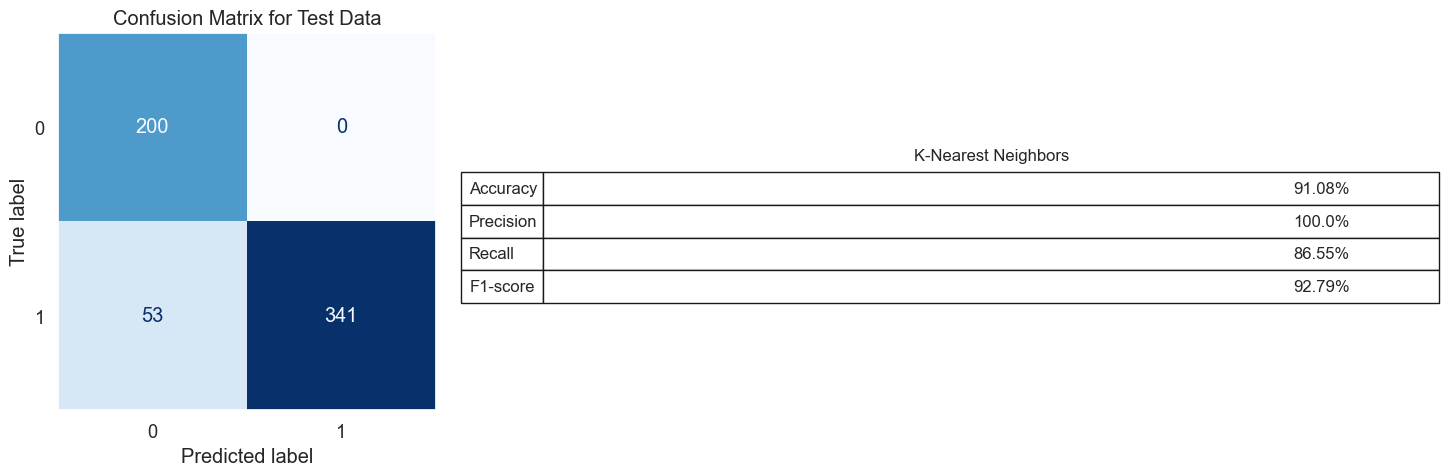

In [192]:
knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
knn.fit(X_train, y_train)
model_evaluation(knn, X_train, X_test, y_train, y_test, 'K-Nearest Neighbors')

### Naive Bayes


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       200
           1       1.00      1.00      1.00       399

    accuracy                           1.00       599
   macro avg       1.00      1.00      1.00       599
weighted avg       1.00      1.00      1.00       599


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.41      1.00      0.59       200
           1       1.00      0.28      0.44       394

    accuracy                           0.53       594
   macro avg       0.71      0.64      0.51       594
weighted avg       0.80      0.53      0.49       594



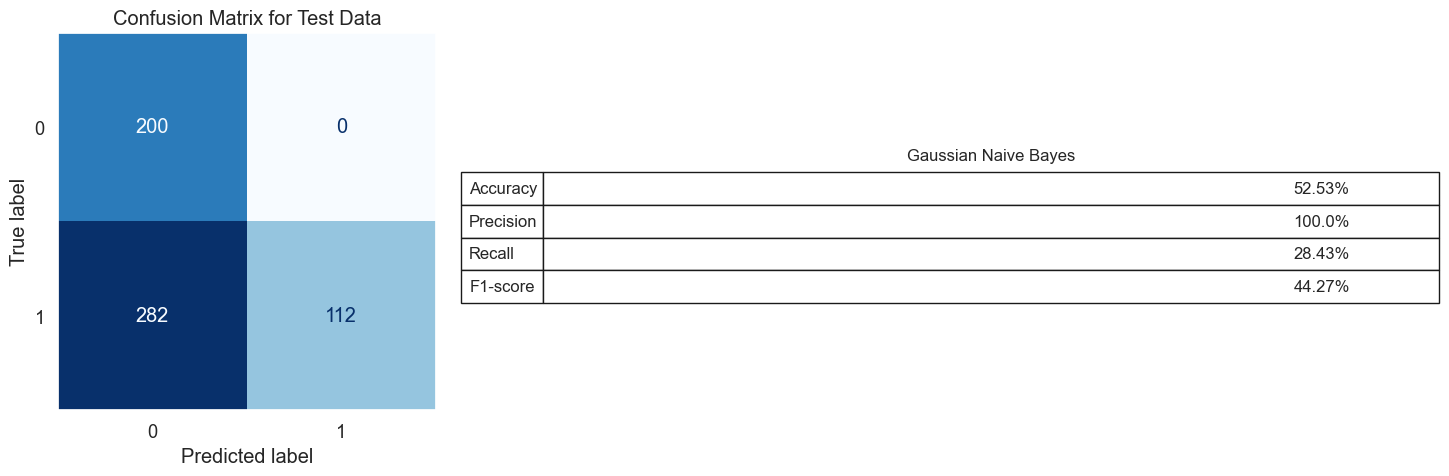

In [193]:
nb = GaussianNB(var_smoothing=1e-7, priors=None)
nb.fit(X_train, y_train)
model_evaluation(nb, X_train, X_test, y_train, y_test, 'Gaussian Naive Bayes')

### Support Vector Machine


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       200
           1       1.00      1.00      1.00       399

    accuracy                           1.00       599
   macro avg       1.00      1.00      1.00       599
weighted avg       1.00      1.00      1.00       599


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.39      1.00      0.56       200
           1       1.00      0.20      0.33       394

    accuracy                           0.47       594
   macro avg       0.69      0.60      0.44       594
weighted avg       0.79      0.47      0.41       594



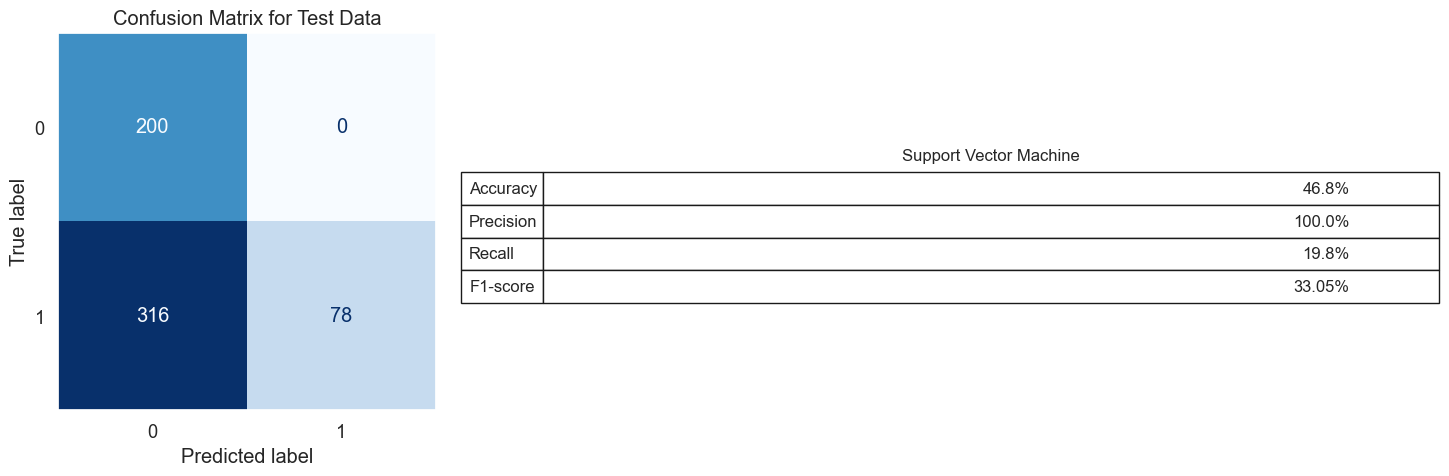

In [194]:
svm = SVC(C=0.1,kernel='rbf',gamma='auto', probability=True)
svm.fit(X_train, y_train)
model_evaluation(svm, X_train, X_test, y_train, y_test, 'Support Vector Machine')

### Decision Tree


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200
           1       1.00      1.00      1.00       399

    accuracy                           1.00       599
   macro avg       1.00      1.00      1.00       599
weighted avg       1.00      1.00      1.00       599


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.34      1.00      0.51       200
           1       1.00      0.02      0.03       394

    accuracy                           0.35       594
   macro avg       0.67      0.51      0.27       594
weighted avg       0.78      0.35      0.19       594



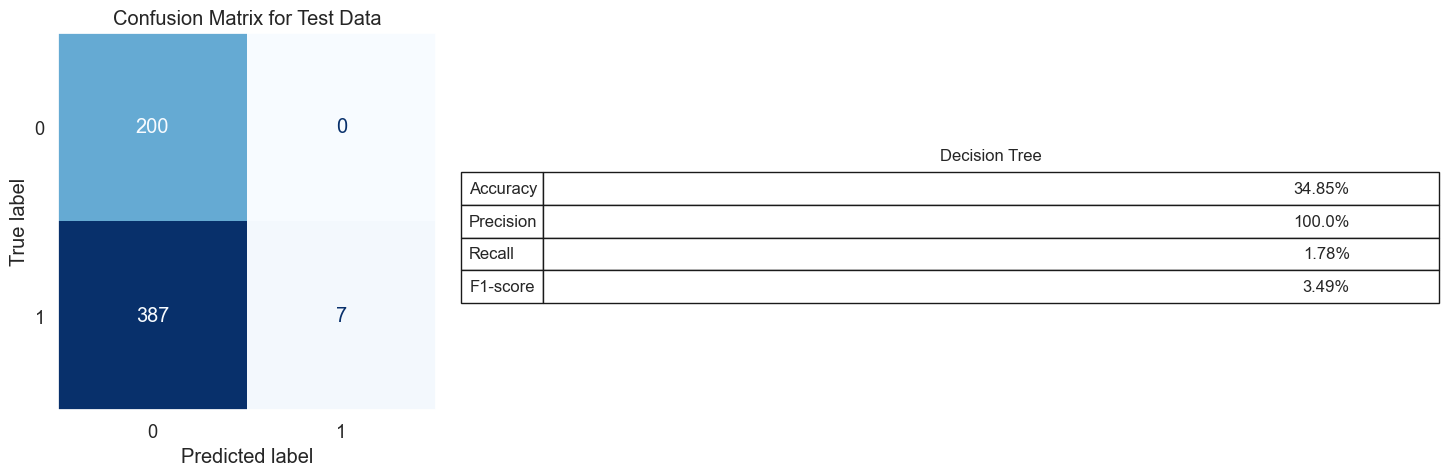

In [195]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_split=2)
dt.fit(X_train, y_train)
model_evaluation(dt, X_train, X_test, y_train, y_test, 'Decision Tree')

### Random Forest


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200
           1       1.00      1.00      1.00       399

    accuracy                           1.00       599
   macro avg       1.00      1.00      1.00       599
weighted avg       1.00      1.00      1.00       599


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.34      1.00      0.51       200
           1       1.00      0.02      0.03       394

    accuracy                           0.35       594
   macro avg       0.67      0.51      0.27       594
weighted avg       0.78      0.35      0.19       594



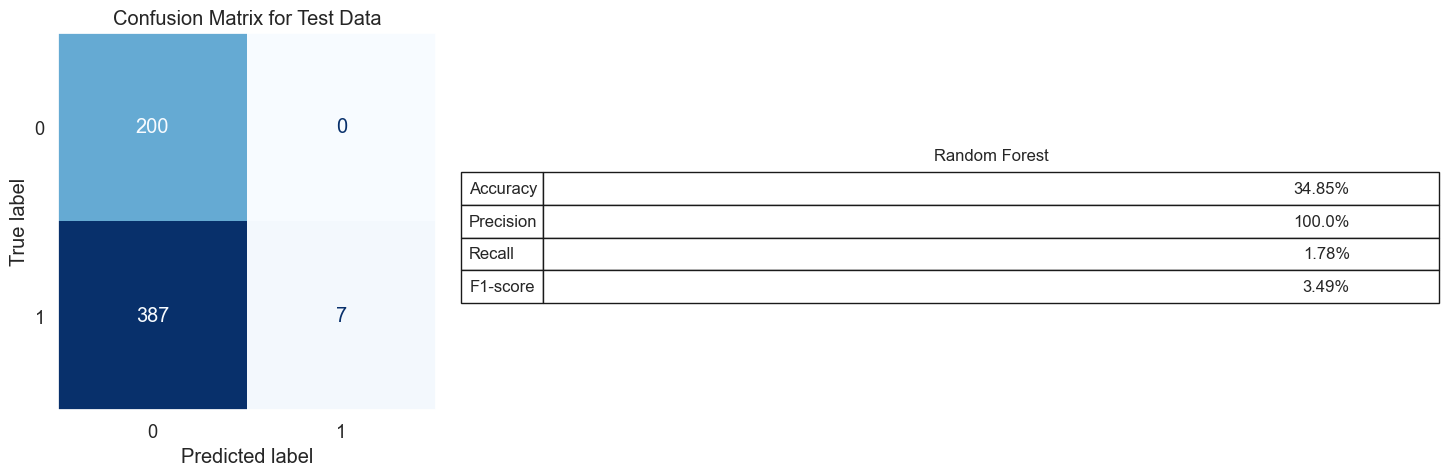

In [196]:
rt = RandomForestClassifier(n_estimators=1000, criterion='entropy', max_depth=5, min_samples_split=2)
rt.fit(X_train, y_train)
model_evaluation(rt, X_train, X_test, y_train, y_test, 'Random Forest')

----

## Conclusion